In [0]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error ,roc_auc_score,confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
#No. 10 (todo exceto letras G e I);
#No. 11 (todo exceto letra G);
#No. 13 (todo menos KNN).

In [10]:
#a)

boston = pd.read_csv('https://raw.githubusercontent.com/tonnioo/scripts_e_vagabundagens/master/Boston.csv')
boston = boston.iloc[:,1:]

median = np.median(boston.crim)

boston['crim_abv_med'] = boston.crim

boston.crim_abv_med = boston.crim_abv_med.replace(boston.crim_abv_med.loc[boston.crim_abv_med > median],1)
boston.crim_abv_med = boston.crim_abv_med.replace(boston.crim_abv_med.loc[boston.crim_abv_med <= median],0)
boston.crim_abv_med = boston.crim_abv_med.apply(int)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_abv_med
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


.


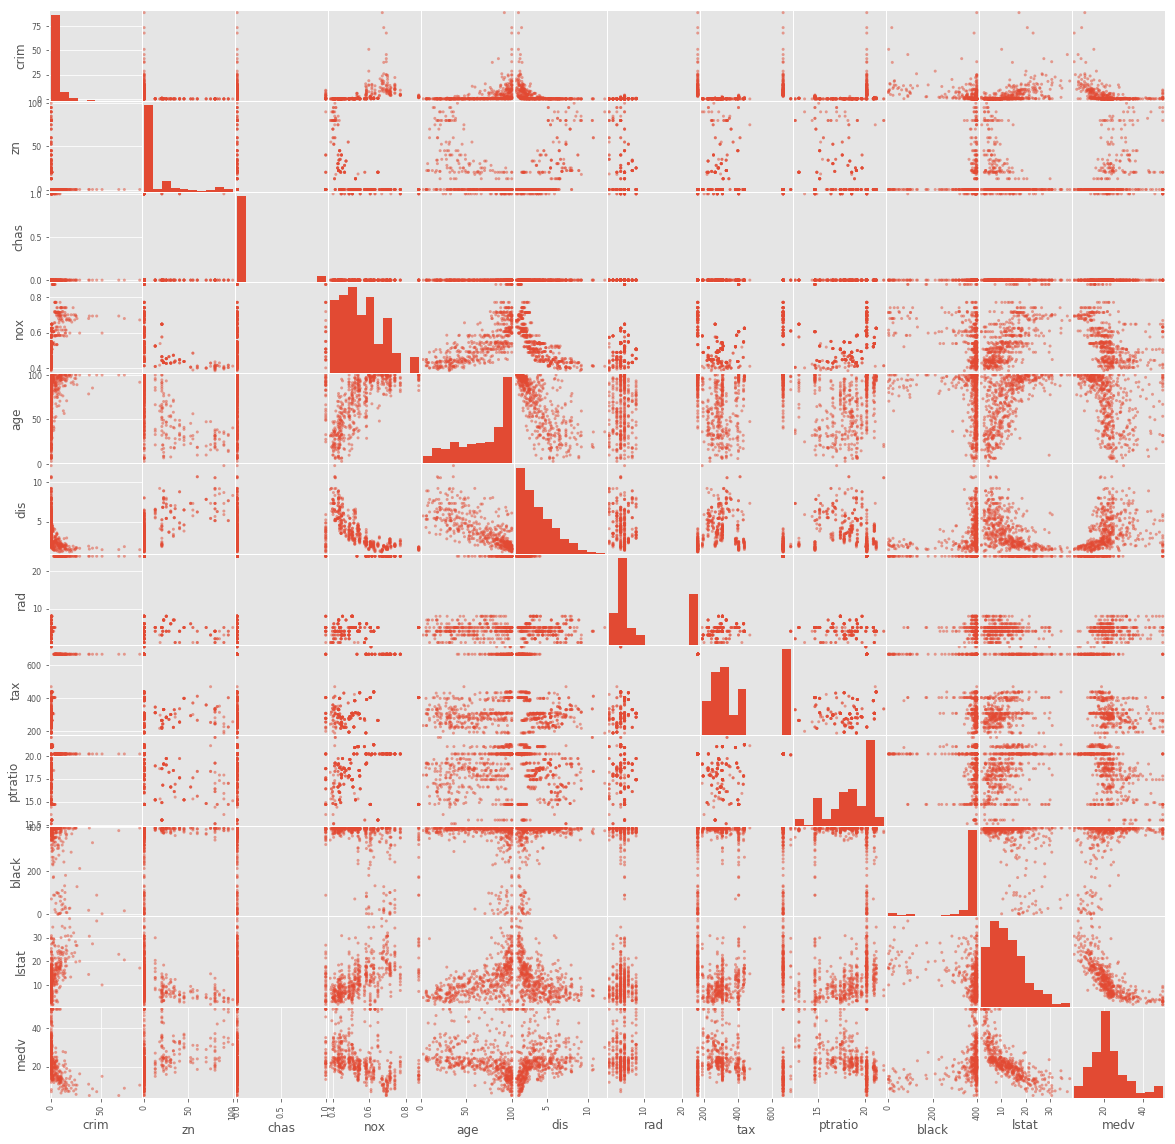

In [25]:
bostonplot = boston.iloc[:,[0,1,3,4,6,7,8,9,10,11,12,13]]
scatter_matrix(bostonplot,figsize = (20,20))
print('.')

In [0]:
zn 	indus 	chas 	nox 	rm 	age 	dis 	rad 	tax 	ptratio 	black 	lstat 	medv

In [0]:
x = boston.iloc[:,[1,3,4,6,7,8,9,10,11,12,13]]
y = boston.crim_abv_med
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [36]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
yhat = logit.predict(x_test)
roc_auc_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.85906432748538

In [37]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
yhat = lda.predict(x_test)
roc_auc_score(y_test,yhat)

0.8637426900584795

In [38]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
yhat = qda.predict(x_test)
roc_auc_score(y_test,yhat)

0.8549707602339182

Linear Discriminant Analysis had better results.